In [285]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from scipy.interpolate import interp1d
import numpy as np
import math


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [286]:
uk_plants = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/Power_Plants/No_Location/power_plants_2018.csv")
uk_plants

,Company,Name,Fuel,Capacity,Start_date
0,AES,Ballylumford B,Gas,540.0,1968.00
1,AES,Ballylumford B OCGT,Gas oil,116.0,1968.00
2,AES,Ballylumford C,CCGT,616.0,2003.00
3,AES,Kilroot OCGT,Gas oil,142.0,1981.00
4,AES,Kilroot,Coal,560.0,1981.00
5,Anesco,Abergelli,Solar,7.7,2015.00
6,Anesco,Anglesey,Solar,14.9,2014.00
7,Anesco,Ashton,Solar,4.8,2017.00
8,Anesco,Askern,Solar,5.0,2015.00
9,Anesco,Beeches,Solar,5.0,2016.00


In [287]:
pp_dat = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/Power_Plants/Power_Plant_costs/plant_cost_data_nan.csv", na_values="")
# pp_dat = pp_dat.rename(columns = {"Unnamed: 0":"Plant_Type","Connect_system_cost:Medium _2025":"Connect_system_cost-Medium_2025","Pre-dev_cost:High _2025":"Pre-dev_cost-High_2025"})
pp_dat = pp_dat.rename(columns = {"Unnamed: 0":"Plant_Type"})

pp_dat

,Plant_Type,Plant_Size,Average_Load_Factor,Efficiency,Operating_Period,Constr_1,Constr_2,Constr_3,Constr_4,Constr_5,Constr_6,Constr_7,Constr_8,Constr_Dur,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_Dur,Connect_system_cost-Medium _2018,Connect_system_cost-Medium _2020,Connect_system_cost-Medium _2025,Constr_cost-High _2018,Constr_cost-High _2020,Constr_cost-High _2025,Constr_cost-Low _2018,Constr_cost-Low _2020,Constr_cost-Low _2025,Constr_cost-Medium _2018,Constr_cost-Medium _2020,Constr_cost-Medium _2025,Fixed_cost-Medium _2018,Fixed_cost-Medium _2020,Fixed_cost-Medium _2025,Infra_cost-High _2018,Infra_cost-High _2020,Infra_cost-High _2025,Infra_cost-Low _2018,Infra_cost-Low _2020,Infra_cost-Low _2025,Infra_cost-Medium _2018,Infra_cost-Medium _2020,Infra_cost-Medium _2025,Insurance_cost-Medium _2018,Insurance_cost-Medium _2020,Insurance_cost-Medium _2025,Pre_dev_cost-High _2018,Pre_dev_cost-High _2020,Pre_dev_cost-High _2025,Pre_dev_cost-Low _2018,Pre_dev_cost-Low _2020,Pre_dev_cost-Low _2025,Pre_dev_cost-Medium _2018,Pre_dev_cost-Medium _2020,Pre_dev_cost-Medium _2025,Var_cost-Medium _2018,Var_cost-Medium _2020,Var_cost-Medium _2025
0,Coal - CCS IGCC retro FOAK,622.000,0.88,0.27,25.000000,0.250,0.250,0.250,0.250,NaN,NaN,NaN,NaN,4,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5400.0,NaN,NaN,3600.0,NaN,NaN,4200.0,NaN,NaN,81900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27600.0,NaN,NaN,100.0,NaN,NaN,60.0,NaN,NaN,60.0,NaN,NaN,6.0
1,Coal - CCS ASC Oxy FOAK,552.000,0.91,0.32,25.000000,0.182,0.182,0.182,0.182,0.182,0.091,NaN,NaN,6,0.167,0.167,0.167,0.167,0.167,0.167,NaN,NaN,6,NaN,NaN,3800.0,NaN,NaN,4400.0,NaN,NaN,2900.0,NaN,NaN,3400.0,NaN,NaN,68200.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,13000.0,NaN,NaN,80.0,NaN,NaN,30.0,NaN,NaN,40.0,NaN,NaN,6.0
2,Coal - CCS ASC NH3 FOAK,624.000,0.91,0.32,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5500.0,NaN,NaN,3400.0,NaN,NaN,4200.0,NaN,NaN,79600.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,19300.0,NaN,NaN,110.0,NaN,NaN,60.0,NaN,NaN,70.0,NaN,NaN,3.0
3,Coal - CCS IGCC FOAK,652.000,0.88,0.30,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5000.0,NaN,NaN,3300.0,NaN,NaN,3900.0,NaN,NaN,65300.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,22700.0,NaN,NaN,80.0,NaN,NaN,50.0,NaN,NaN,60.0,NaN,NaN,5.0
4,Coal - CCS IGCC partial FOAK,760.000,0.88,0.35,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,3600.0,NaN,NaN,2400.0,NaN,NaN,2800.0,NaN,NaN,52100.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,14000.0,NaN,NaN,60.0,NaN,NaN,40.0,NaN,NaN,40.0,NaN,NaN,5.0
5,PV 1-5MW building,1.000,0.11,0.00,25.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1300.0,1300.0,1200.0,800.0,800.0,700.0,700.0,600.0,600.0,700.0,700.0,600.0,6600.0,6300.0,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2600.0,2600.0,2400.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,3.0,3.0,3.0
6,EfW,30.000,0.81,0.28,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,4,16700.0,16500.0,16100.0,12500.0,12400.0,12200.0,4600.0,4600.0,4500.0,8200.0,8100.0,8000.0,139500.0,137900.0,134800.0,6600.0,6600.0,6600.0,2500.0,2500.0,2500.0,4600.0,4600.0,4600.0,30500.0,30100.0,29500.0,390.0,390.0,390.0,110.0,110.0,110.0,230.0,230.0,230.0,25.0,25.0,24.0
7,EfW CHP,24.000,0.81,0.22,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,4,16700.0,16500.0,16100.0,15900.0,15800.0,15600.0,10300.0,10300.0,10100.0,13300.0,13200.0,13000.0,153000.0,151300.0,147900.0,8500.0,8500.0,8500.0,3000.0,3000.0,3000.0,5900.0,5900.0,5900.0,85200.0,84300.0,82400.0,300.0,300.0,300.0,130.0,130.0,130.0,210.0,210.0,210.0,55.0,55.0,53.0
8,AD,2.000,0.79,0.40,20.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [288]:
# split_by_plant = pp_dat['Plant_Type'].transform(lambda x: "CCGT" if x.str.contains('CCGT') else x)
pp_dat['Type'] = pp_dat['Plant_Type'].map(lambda x: "Coal" if "Coal" in x else "PV" if "PV" in x else "EfW" if "EfW" in x
                                          else "AD" if "AD" in x else "ACT" if "ACT" in x else "Offshore" if "Offshore" in x
                                          else "Biomass" if "Biomass" in x else "Conversions" if "Conversions" in x 
                                          else "Onshore" if "Onshore" in x else "Landfill" if "Landfill" in x
                                          else "Sewage" if "Sewage" in x else "Geothermal" if "Geothermal" in x 
                                          else "Hydro_Store" if all(check in x for check in ['Hydro','Store'])
                                          else "Hydro" if "Hydro" in x
                                          else "Wave" if "Wave" in x else "Tidal" if "Tidal" in x 
#                                           else "OCGT_2000hr" if all(check in x for check in ["OCGT", "2000"]) 
                                          else "OCGT" if all(check in x for check in ["OCGT", "2000"]) 
                                          else "OCGT_500hr" if all(check in x for check in ["OCGT", "500"])
                                          else "CCGT" if "CCGT" in x
                                          else "OCGT" if "OCGT" in x
                                          else "Recip_gas" if "Recip Gas" in x else "Recip_gas" if "RECIP GAS" in x else "Nuclear" if "Nuclear" in x 
                                          else "Pumped_storage" if "Pumped" in x
                                          else "PV" if "Solar" in x else "Recip_diesel" if "Recip Diesel" in x 
                                          else "")

# print(pp_dat[pp_dat['Type'].str.contains("hr")].sort_values('Plant_Size'))

print(pp_dat[['Plant_Type','Plant_Size',"Type"]])

pp_dat.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/Power_Plants/Power_Plant_costs/Power_Plant_Costs_CSV/power_plant_costs_with_simplified_type.csv')

                         Plant_Type  Plant_Size            Type
0       Coal - CCS IGCC retro FOAK      622.000            Coal
1          Coal - CCS ASC Oxy FOAK      552.000            Coal
2          Coal - CCS ASC NH3 FOAK      624.000            Coal
3             Coal - CCS IGCC FOAK      652.000            Coal
4     Coal - CCS IGCC partial FOAK      760.000            Coal
5                PV 1-5MW building        1.000              PV
6                              EfW       30.000             EfW
7                          EfW CHP       24.000             EfW
8                               AD        2.000              AD
9                           AD CHP        2.000              AD
10                    ACT Standard       12.000             ACT
11                    ACT Advanced        9.000             ACT
12                         ACT CHP        1.000             ACT
13                     Offshore R2      321.000        Offshore
14                     Offshore R3      

In [289]:
pp_dat

,Plant_Type,Plant_Size,Average_Load_Factor,Efficiency,Operating_Period,Constr_1,Constr_2,Constr_3,Constr_4,Constr_5,Constr_6,Constr_7,Constr_8,Constr_Dur,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_Dur,Connect_system_cost-Medium _2018,Connect_system_cost-Medium _2020,Connect_system_cost-Medium _2025,Constr_cost-High _2018,Constr_cost-High _2020,Constr_cost-High _2025,Constr_cost-Low _2018,Constr_cost-Low _2020,Constr_cost-Low _2025,Constr_cost-Medium _2018,Constr_cost-Medium _2020,Constr_cost-Medium _2025,Fixed_cost-Medium _2018,Fixed_cost-Medium _2020,Fixed_cost-Medium _2025,Infra_cost-High _2018,Infra_cost-High _2020,Infra_cost-High _2025,Infra_cost-Low _2018,Infra_cost-Low _2020,Infra_cost-Low _2025,Infra_cost-Medium _2018,Infra_cost-Medium _2020,Infra_cost-Medium _2025,Insurance_cost-Medium _2018,Insurance_cost-Medium _2020,Insurance_cost-Medium _2025,Pre_dev_cost-High _2018,Pre_dev_cost-High _2020,Pre_dev_cost-High _2025,Pre_dev_cost-Low _2018,Pre_dev_cost-Low _2020,Pre_dev_cost-Low _2025,Pre_dev_cost-Medium _2018,Pre_dev_cost-Medium _2020,Pre_dev_cost-Medium _2025,Var_cost-Medium _2018,Var_cost-Medium _2020,Var_cost-Medium _2025,Type
0,Coal - CCS IGCC retro FOAK,622.000,0.88,0.27,25.000000,0.250,0.250,0.250,0.250,NaN,NaN,NaN,NaN,4,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5400.0,NaN,NaN,3600.0,NaN,NaN,4200.0,NaN,NaN,81900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27600.0,NaN,NaN,100.0,NaN,NaN,60.0,NaN,NaN,60.0,NaN,NaN,6.0,Coal
1,Coal - CCS ASC Oxy FOAK,552.000,0.91,0.32,25.000000,0.182,0.182,0.182,0.182,0.182,0.091,NaN,NaN,6,0.167,0.167,0.167,0.167,0.167,0.167,NaN,NaN,6,NaN,NaN,3800.0,NaN,NaN,4400.0,NaN,NaN,2900.0,NaN,NaN,3400.0,NaN,NaN,68200.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,13000.0,NaN,NaN,80.0,NaN,NaN,30.0,NaN,NaN,40.0,NaN,NaN,6.0,Coal
2,Coal - CCS ASC NH3 FOAK,624.000,0.91,0.32,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5500.0,NaN,NaN,3400.0,NaN,NaN,4200.0,NaN,NaN,79600.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,19300.0,NaN,NaN,110.0,NaN,NaN,60.0,NaN,NaN,70.0,NaN,NaN,3.0,Coal
3,Coal - CCS IGCC FOAK,652.000,0.88,0.30,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,5000.0,NaN,NaN,3300.0,NaN,NaN,3900.0,NaN,NaN,65300.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,22700.0,NaN,NaN,80.0,NaN,NaN,50.0,NaN,NaN,60.0,NaN,NaN,5.0,Coal
4,Coal - CCS IGCC partial FOAK,760.000,0.88,0.35,25.000000,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,0.200,0.200,0.200,0.200,0.200,NaN,NaN,NaN,5,NaN,NaN,3800.0,NaN,NaN,3600.0,NaN,NaN,2400.0,NaN,NaN,2800.0,NaN,NaN,52100.0,NaN,NaN,15000.0,NaN,NaN,5000.0,NaN,NaN,10000.0,NaN,NaN,14000.0,NaN,NaN,60.0,NaN,NaN,40.0,NaN,NaN,40.0,NaN,NaN,5.0,Coal
5,PV 1-5MW building,1.000,0.11,0.00,25.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1300.0,1300.0,1200.0,800.0,800.0,700.0,700.0,600.0,600.0,700.0,700.0,600.0,6600.0,6300.0,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2600.0,2600.0,2400.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,3.0,3.0,3.0,PV
6,EfW,30.000,0.81,0.28,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,4,16700.0,16500.0,16100.0,12500.0,12400.0,12200.0,4600.0,4600.0,4500.0,8200.0,8100.0,8000.0,139500.0,137900.0,134800.0,6600.0,6600.0,6600.0,2500.0,2500.0,2500.0,4600.0,4600.0,4600.0,30500.0,30100.0,29500.0,390.0,390.0,390.0,110.0,110.0,110.0,230.0,230.0,230.0,25.0,25.0,24.0,EfW
7,EfW CHP,24.000,0.81,0.22,35.000000,0.333,0.333,0.333,NaN,NaN,NaN,NaN,NaN,3,0.228,0.228,0.228,0.228,0.090,NaN,NaN,NaN,4,16700.0,16500.0,16100.0,15900.0,15800.0,15600.0,10300.0,10300.0,10100.0,13300.0,13200.0,13000.0,153000.0,151300.0,147900.0,8500.0,8500.0,8500.0,3000.0,3000.0,3000.0,5900.0,5900.0,5900.0,85200.0,84300.0,82400.0,300.0,300.0,300.0,130.0,130.0,130.0,210.0,210.0,210.0,55.0,55.0,53.0,EfW
8,AD,2.000,0.79,0.40,2

In [290]:
pp_dat[pp_dat.Type=='Coal'].filter(regex='2018').isnull().all(1)

# pp_dat.apply(lambda x: 0 if not x.filter(regex='2018').isnull().all() and x.filter(regex='Var_cost-Medium').isnull().all() and x['Var_cost-Medium _2018'] else x, axis=1)
for name, row in pp_dat.iterrows():
#     if not row.filter(regex='2018').isnull().all() and row.filter(regex=['Var_cost-Medium']).isnull().all():
    if not (row.filter(regex='2018').isnull().all() or row.filter(regex='2025').isnull().all()) and row[['Var_cost-Medium _2018','Infra_cost-High _2018','Insurance_cost-Medium _2018','Connect_system_cost-Medium _2018','Pre_dev_cost-High _2018']].isnull().any():
#         print "------------------------------------"
#         print(row.Plant_Type)
        cols_to_change = row.filter(regex='^((?!Constr).)*$').filter(regex='^((?!Pre).)*$').filter(regex='^((?!Plant_Type).)*$').filter(regex='^((?!Plant_Size).)*$').filter(regex='^((?!Average_Load).)*$').filter(regex='^((?!Efficiency).)*$').filter(regex='^((?!Operating).)*$').axes[0]
        row[cols_to_change] = row[cols_to_change].fillna(0)
#         print(row)
        
        


#         print(row[row.filter(regex='Var_cost').axes[0]])
#         row[row.filter(regex='Var_cost').axes[0]] = row[row.filter(regex='Var_cost').axes[0]].fillna(0)
#         print(row[row.filter(regex='Var_cost').axes[0]])
#         print row
        #         if row.filter(regex='Var_cost-Medium').isnull().all():
#             row.filter(regex='Var_cost-Medium')=0





In [291]:
pp_dat1 = pp_dat.apply(lambda x: 0 if not (row.filter(regex='2018').isnull().all() or row.filter(regex='2025').isnull().all()) and row[['Var_cost-Medium _2018','Infra_cost-High _2018','Insurance_cost-Medium _2018','Connect_system_cost-Medium _2018','Pre_dev_cost-High _2018']].isnull().any() else x)
print(pp_dat1)






Plant_Type                          0
Plant_Size                          0
Average_Load_Factor                 0
Efficiency                          0
Operating_Period                    0
Constr_1                            0
Constr_2                            0
Constr_3                            0
Constr_4                            0
Constr_5                            0
Constr_6                            0
Constr_7                            0
Constr_8                            0
Constr_Dur                          0
Pre_1                               0
Pre_2                               0
Pre_3                               0
Pre_4                               0
Pre_5                               0
Pre_6                               0
Pre_7                               0
Pre_8                               0
Pre_Dur                             0
Connect_system_cost-Medium _2018    0
Connect_system_cost-Medium _2020    0
Connect_system_cost-Medium _2025    0
Constr_cost-

In [24]:
pp_dat[pp_dat.Type=='Coal'].filter(regex='2018')

,Connect_system_cost-Medium _2018,Constr_cost-High _2018,Constr_cost-Low _2018,Constr_cost-Medium _2018,Fixed_cost-Medium _2018,Infra_cost-High _2018,Infra_cost-Low _2018,Infra_cost-Medium _2018,Insurance_cost-Medium _2018,Pre_dev_cost-High _2018,Pre_dev_cost-Low _2018,Pre_dev_cost-Medium _2018,Var_cost-Medium _2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
plot_vals = ['Connect_system_cost-Medium _2018', 'Constr_cost-Medium _2018', 'Fixed_cost-Medium _2018', 
             'Infra_cost-Medium _2018', 'Insurance_cost-Medium _2018', 'Pre_dev_cost-Medium _2018', 
             'Var_cost-Medium _2018']

In [34]:
grouped = pp_dat.groupby('Type').filter(lambda x: len(x.index)>1).groupby('Type')
rowlength= grouped.ngroups/2

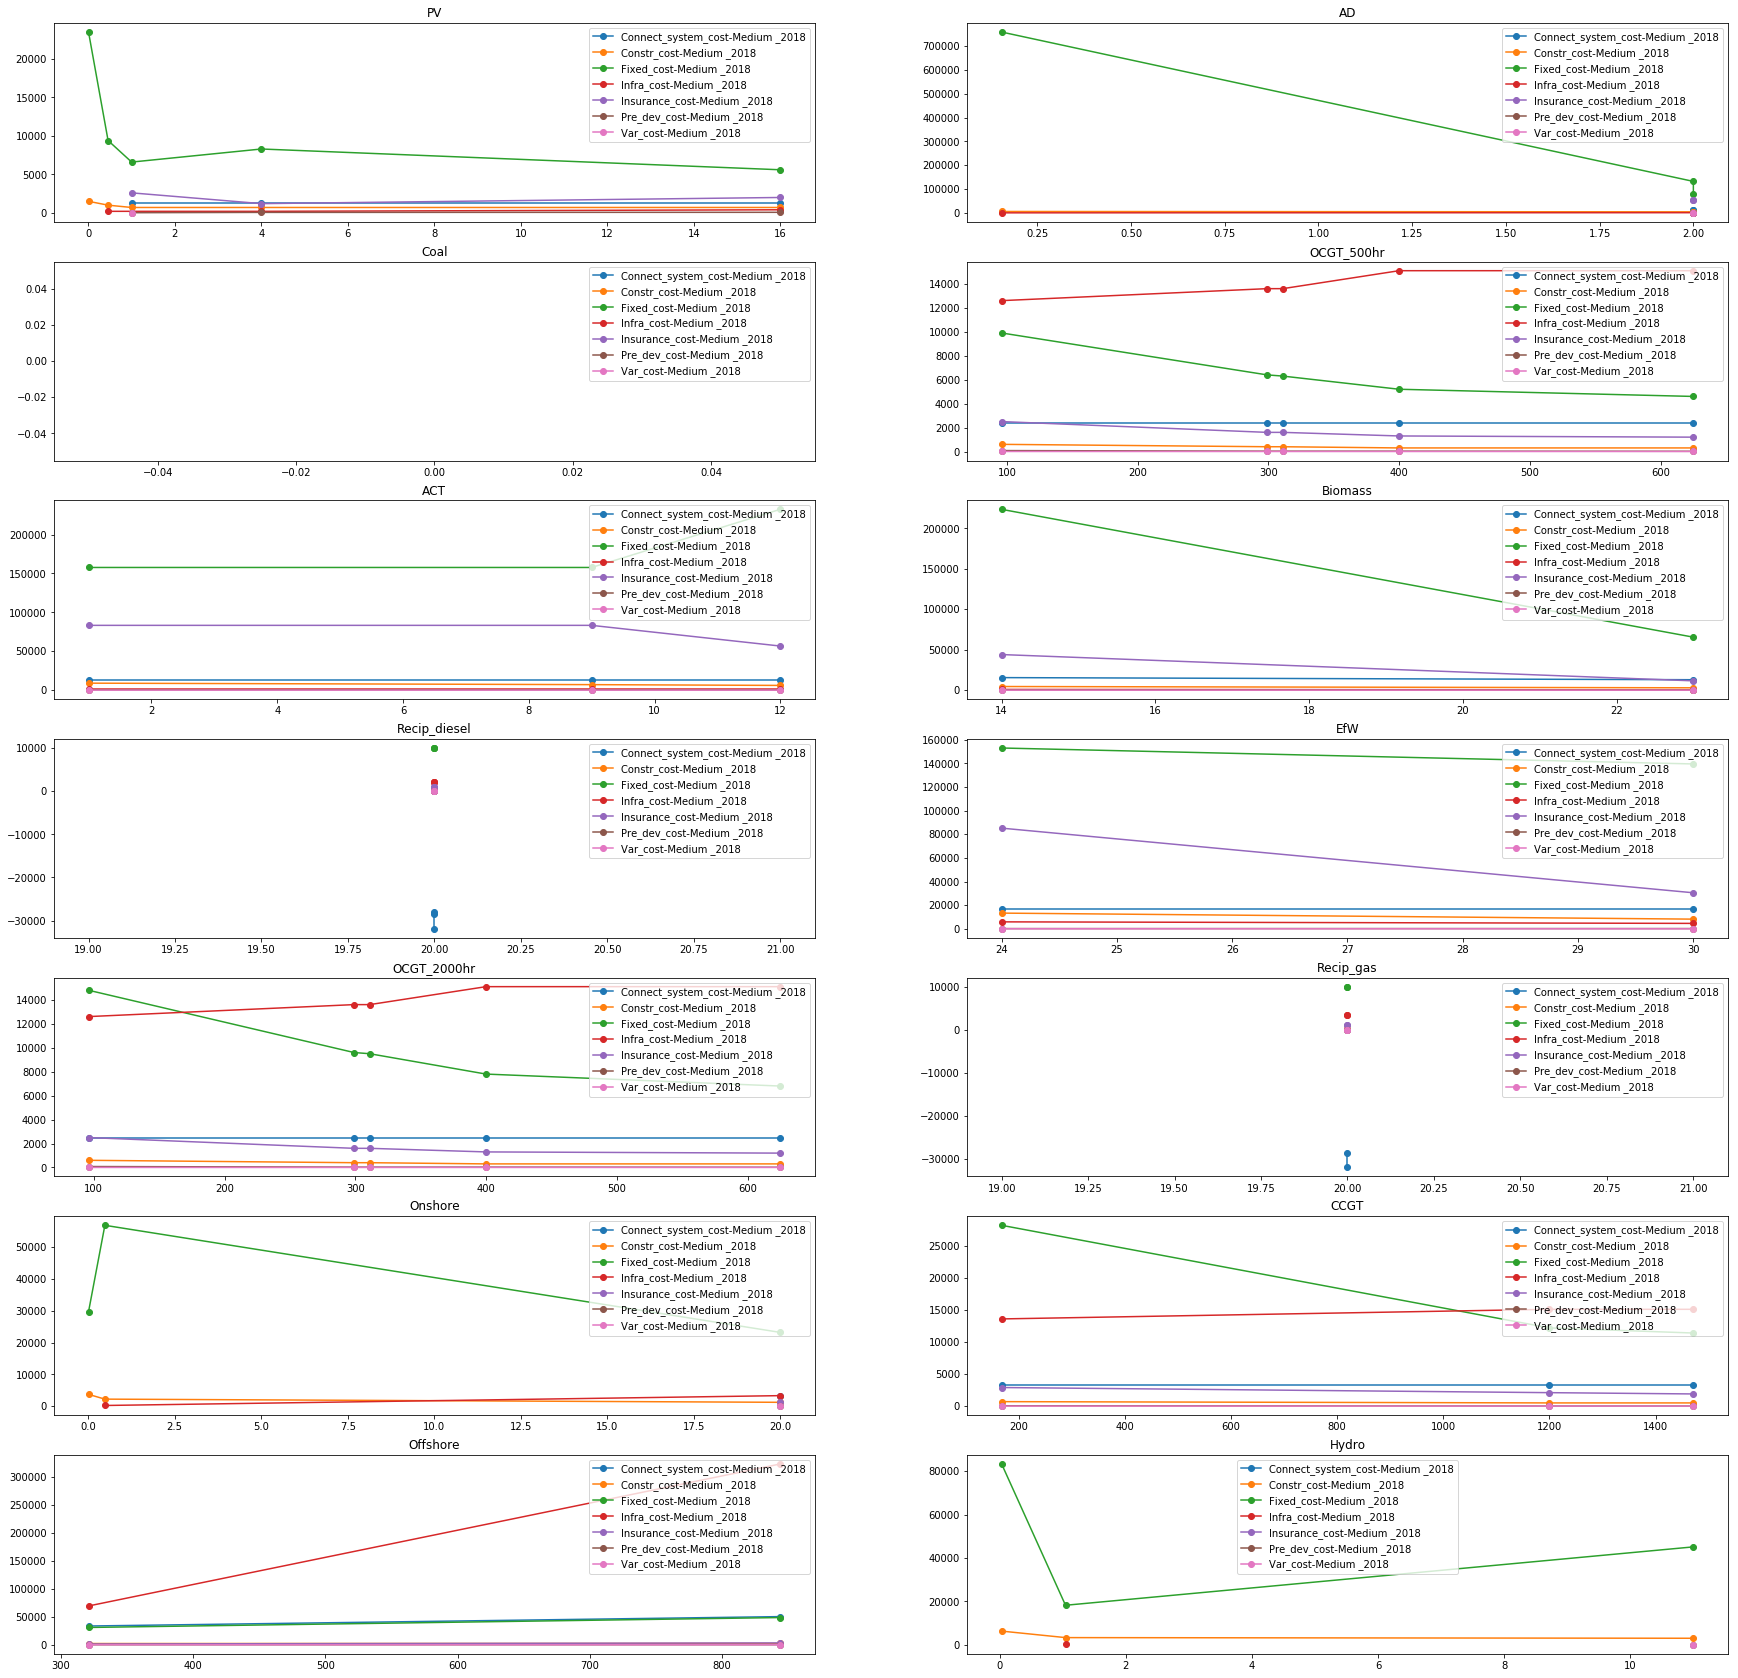

In [35]:
fig, axs = plt.subplots(nrows=rowlength, ncols=2, figsize=(30,30))

targets = zip(grouped.groups.keys(), axs.flatten())
# print(targets)
for (key, ax) in targets:
    plant_group = grouped.get_group(key).sort_values('Plant_Size',ascending=False)
#     print(plant_group)
    
    for col in plot_vals:
        rem_na = plant_group[['Plant_Size', col]].dropna()
        ax.plot(rem_na['Plant_Size'],rem_na[col], label=col, marker='o')
        ax.set_title(key)
    ax.legend(loc='upper right')
ax.legend()
plt.show()

fig.savefig("plant_cost_data_plots")

In [36]:
class predict_point():
    def __init__(self, plant_size, cost_var):
        self.plant_size = plant_size
        self.cost_var = cost_var
        
    def __call__(self, x_new):
        if type(x_new) == list: 
            output = [self.predict(x) for x in x_new]
            return output
        else:
            return self.predict(x_new)

    def predict(self, x_new):
        if(x_new<=min(self.plant_size)):
            return self.cost_var.iloc[0]
        elif(x_new>=max(self.plant_size)):
            return self.cost_var.iloc[-1]
        else:
            interp = interp1d(self.plant_size, self.cost_var)
            return interp(x_new)        

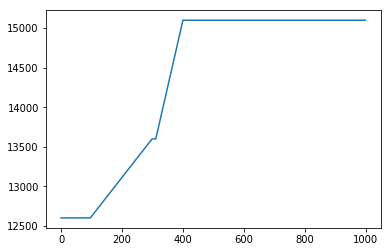

In [37]:
ocgt_2000 = pp_dat[pp_dat['Type'].str.contains("OCGT_2000hr")]

ocgt_2000=ocgt_2000.sort_values('Plant_Size')

test_string = 'Infra_cost-Medium _2018'

prediction = predict_point(ocgt_2000['Plant_Size'], ocgt_2000[test_string])
prediction(20)

x_test = range(1000)
output = prediction(x_test)
plt.plot(x_test, output)
plt.show()





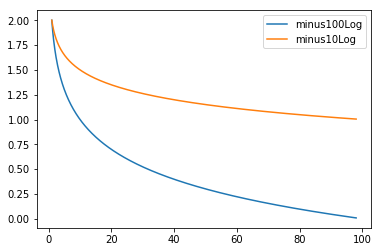

In [38]:
x_test = np.linspace(1,98,1000)

cube_root = x_test ** (1. /3)
# print(cube_root)

quad_root = x_test ** (1. /4)
# print(quad_root)

dec_root = x_test ** (1. /10)

log10 = [math.log(x,40) for x in x_test]

logE = [math.log10(x) for x in x_test]

minus10Log = [-math.log(x,10)+2 for x in x_test]
minus100Log = [-math.log(x,100)+2 for x in x_test]

plt.plot(x_test,minus10Log,label="minus100Log")
plt.plot(x_test,minus100Log,label="minus10Log")
plt.legend()
plt.show()

In [39]:
uk_plants_fuel = uk_plants.groupby('Fuel')
uk_row_length = uk_plants_fuel.ngroups/2

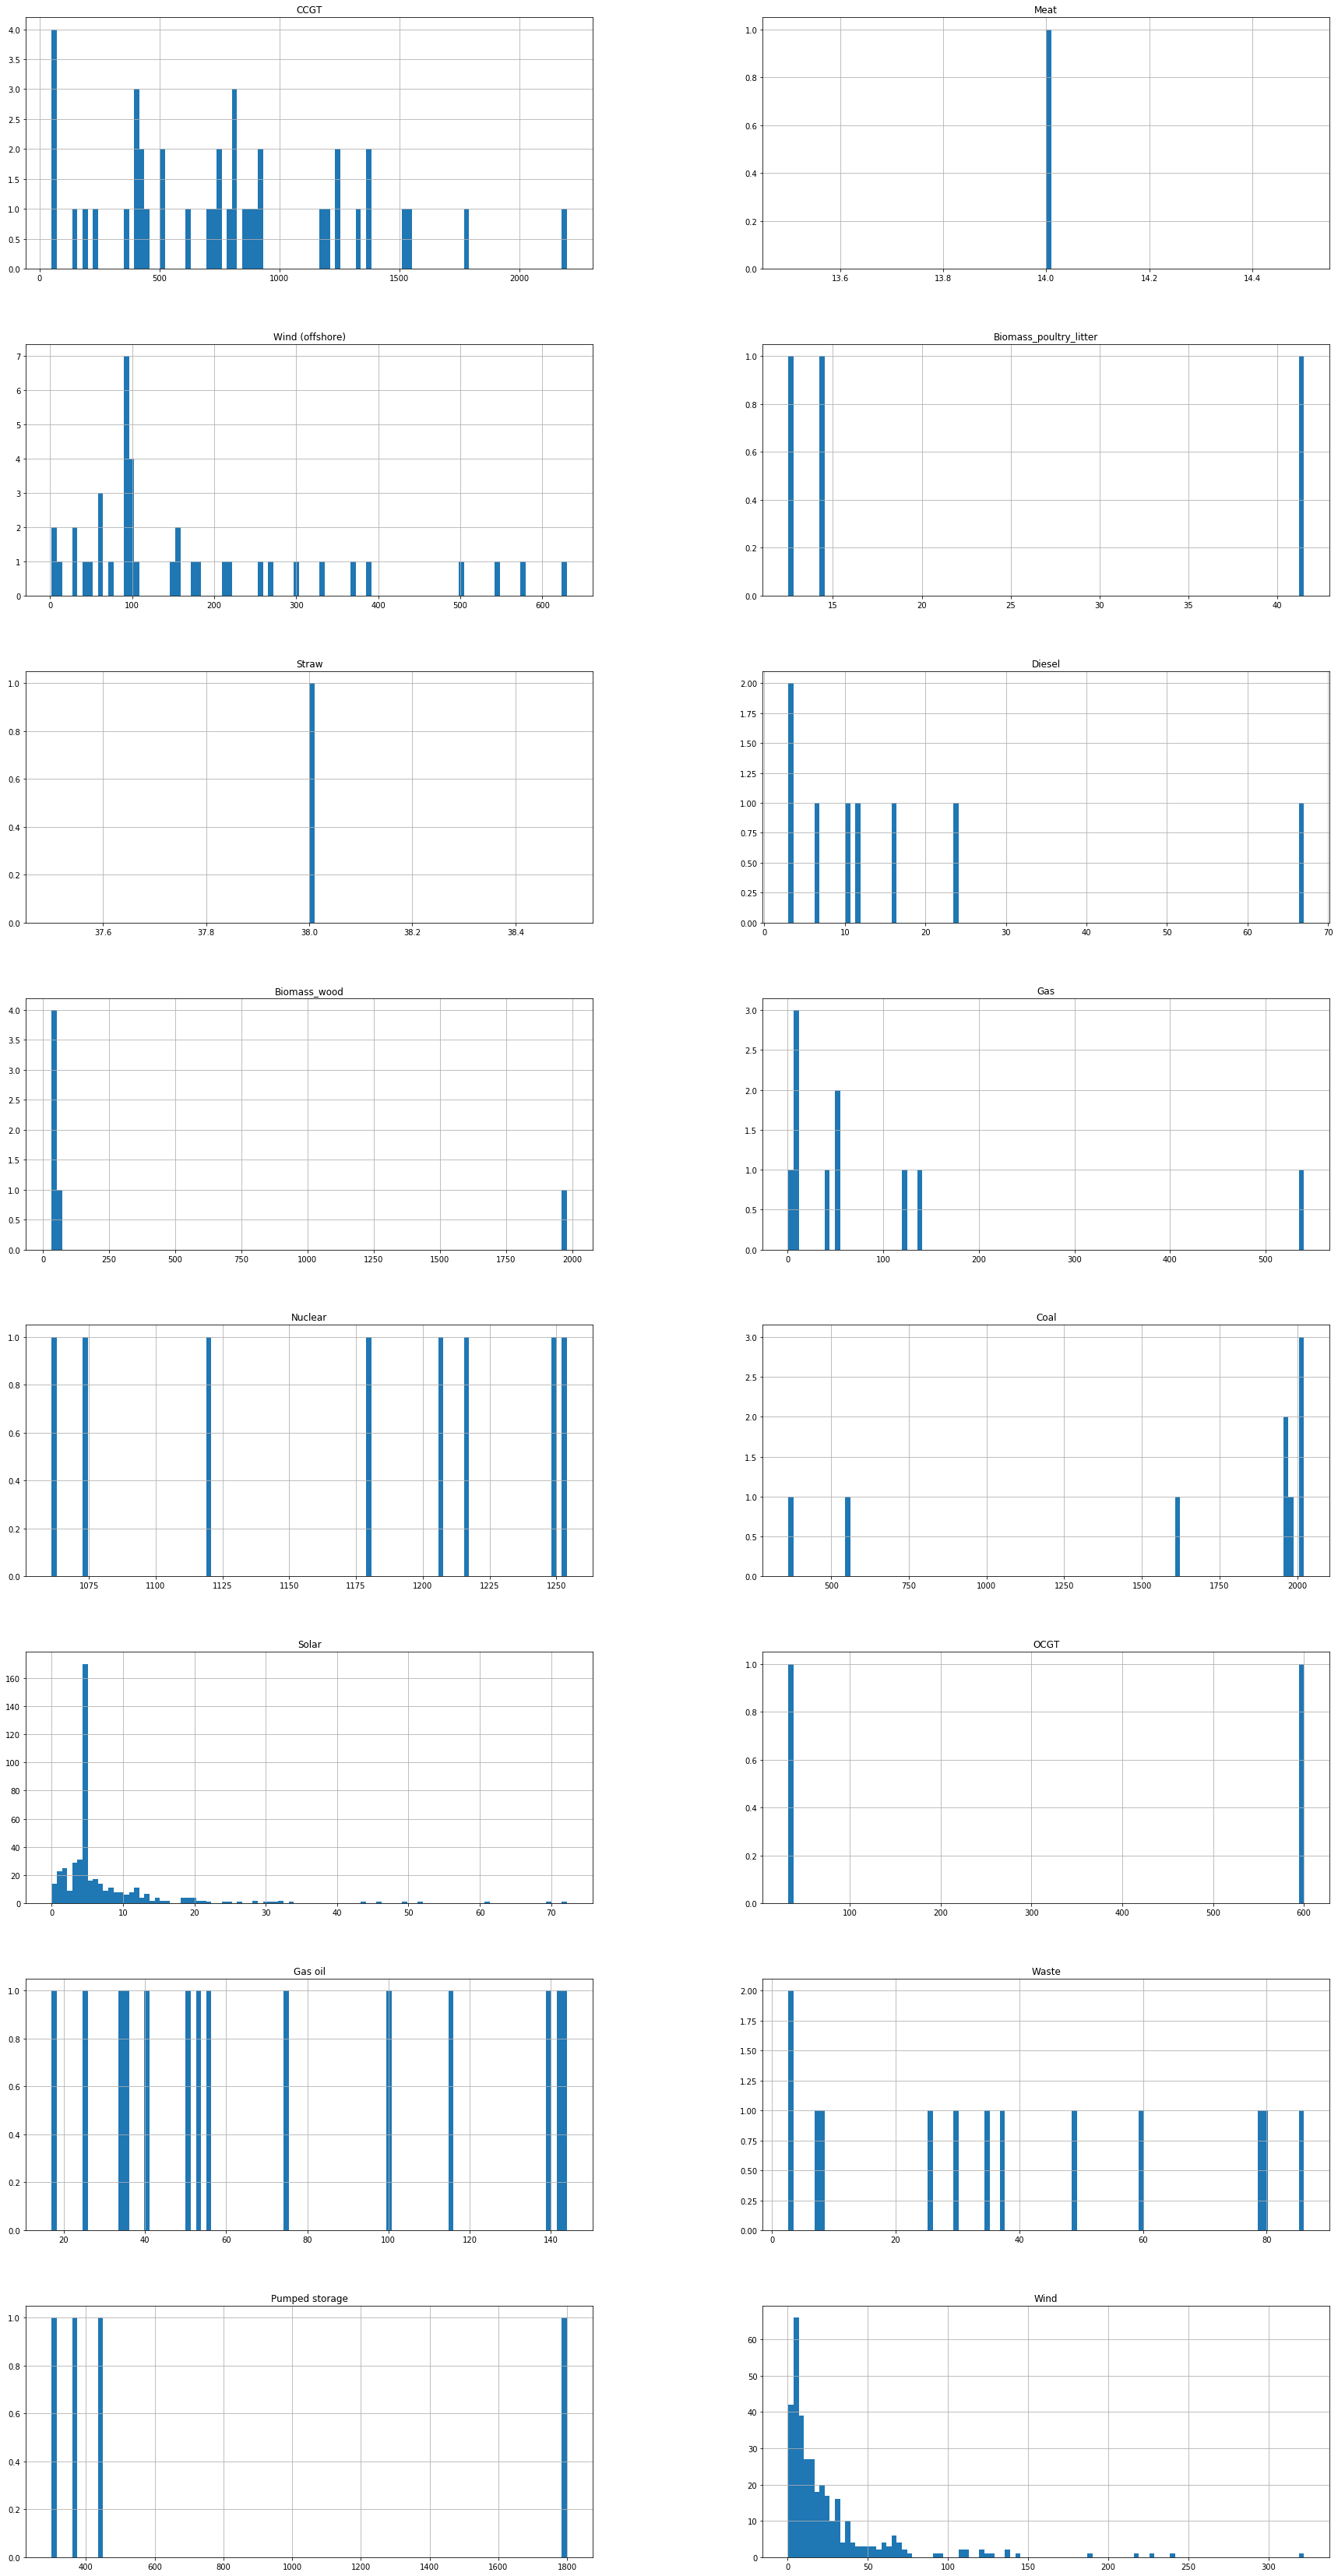

In [40]:
fig1, axes1 = plt.subplots(nrows=uk_row_length, ncols=2, figsize=(30,60))

targets1 = zip(uk_plants_fuel.groups.keys(), axes1.flatten())

for (key1, ax1) in targets1:
    uk_plant_group = uk_plants_fuel.get_group(key1).sort_values('Capacity')
    
    uk_plant_group.hist(ax=ax1, column='Capacity', bins=100)
    ax1.set_title(key1)
    
plt.show()
fig1.savefig('uk_plant_hist')